In [2]:
import numpy as np
import scipy
from scipy.optimize import curve_fit
import matplotlib 
from matplotlib import pyplot as plt
from pylab import *
from scipy import odr as odr

def odrFit(xValues, xErrors, yValues, yErrors, fitFunction, startParams):
    fitModel = odr.Model(fitFunction)
    data = odr.RealData(xValues, yValues, sx=xErrors, sy=yErrors)
    fitter = odr.ODR(data, fitModel, beta0=startParams)
    out = fitter.run()
    popt = out.beta
    perr = out.sd_beta

    ndof = xValues.size - startParams.size
    for index in range(0, popt.size):
        print('p' + str(index) + ' = ' + str(round(popt[index], 3)) 
              + ' +- ' + str(round(perr[index], 3)))
    print('Chi^2 = ' + str(round(out.sum_square, 3)))
    print('red. Chi^2 = ' + str(round(out.res_var, 3)))
    print()
    return popt,perr,out

p0 = 437.552 +- 72.309
p1 = 2.583 +- 0.424
p2 = 7.21 +- 7.256
Chi^2 = 28.476
red. Chi^2 = 5.695

Beta: [437.55155166   2.58337684   7.2099917 ]
Beta Std Error: [72.3085975   0.42447991  7.25624727]
Beta Covariance: [[ 9.18049604e+02 -4.01705922e+00  2.41849151e+01]
 [-4.01705922e+00  3.16373830e-02 -3.62953203e-01]
 [ 2.41849151e+01 -3.62953203e-01  9.24507458e+00]]
Residual Variance: 5.695262269583678
Inverse Condition #: 0.11620163617269119
Reason(s) for Halting:
  Sum of squares convergence


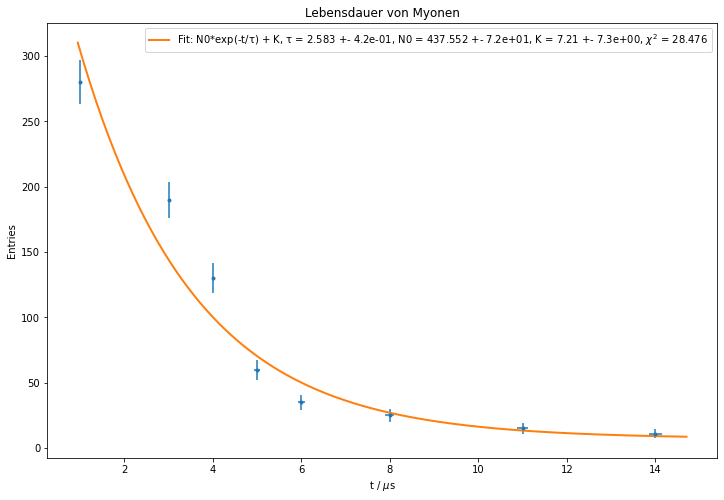

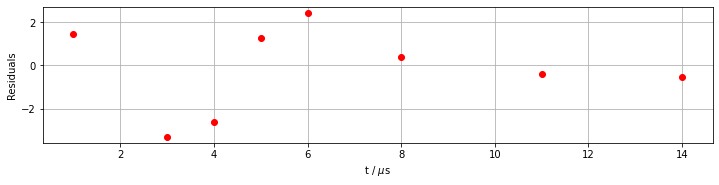

In [4]:

# import the odrFit package
# from odrFit import *

# Define the function that should be fitted to the data points.
# In this example we fit an exponential plus a constant background to some (time, counts) data
# points. The errors of the counts is the sqrt of the counts, the errors in time are just some
# arbitrary numbers.
#
# The parameters which get varied during the fit are stored in a numpy array, which is called "params"
# in this example. The parameter array has to be the first argument of the function.
# The free variable, the x variable fo our function, is the second argument of the function.
#
## The fitter which we use, uses numpy arrays everywhere for speed reasons! 
## Our fitFunc will be called with x being a numpy array, too! Therefore, inside the function
## we have to use only mathematical functions which can work on numpy arrays and returns numpy
## arrays. Basically we have to use the functions from the numpy package, like numpy.exp()
## for the exponential function in this example.

def fitFunc(params, x):
    p0, p1, p2 = params
    return (p0 * np.exp(-x/p1) + p2)

# Define the numpy arrays with the data points and the corresponding errors:

xData = np.array([1, 3, 4, 5, 6, 8, 11, 14])
xErr = np.array([0.0001, 0.02, 0.004, 0.06, 0.08, 0.1, 0.12, 0.14])
yData = np.array([280, 190, 130, 60, 35, 25, 15, 11])
yErr = np.sqrt(yData)

# Set the start values for the parameters of our function, and call the fit routine. 
# Remember: all arguments of our fitFunc are numpy arrays:

startParameters = np.array([200., 2.0, 9.])
popt, perr, fitResult = odrFit(xData, xErr, yData, yErr, fitFunc, startParameters)

# Have a look to the fit result:
fitResult.pprint()

# Let's make a plot of the result:

x_fit = np.linspace(0.95*min(xData), 1.05*max(xData), 200)
fit = fitFunc(popt, x_fit)

# calculate the residuals in y direction
residuals = fitResult.eps / yErr

error_fmt = " +- {:.1e}"

fig1 = plt.figure(figsize=(12,8))
plt.errorbar(xData, yData, xerr = xErr, yerr = yErr, fmt = '.')
plt.plot(x_fit, fit, lw=2, label=
         'Fit: N0*exp(-t/\u03C4) + K, \u03C4 = ' + str(round(popt[1], 3)) + error_fmt.format(perr[1]) 
         + ', N0 = ' + str(round(popt[0], 3)) + error_fmt.format(perr[0]) 
         + ', K = ' + str(round(popt[2], 3)) + error_fmt.format(perr[2]) 
         + ', $\chi^2$ = ' + str(round(fitResult.sum_square, 3)))
plt.xlabel('t / $\mu$s')
plt.ylabel('Entries')
plt.legend()
plt.title('Lebensdauer von Myonen')

fig2 = plt.figure(figsize=(12,2.5))
plot(xData, residuals,'or')
plt.xlabel('t / $\mu$s')
plt.ylabel('Residuals')
plt.grid()

plt.show()

# The quite large values for Chi^2 and Chi^2/ndof show that this is not a good fit, what is aslo
# clearly visible in the plot. The statistical errors are not sufficient to explain the spread
# of the data points around the best curve.